In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.pandas.set_option('display.max_columns',None)

In [3]:

df=pd.read_csv('cleaned_titanic_numerical.csv')
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,1,38.000000,1.0,0.0,8.442944,0,0,0
1,1,3,26.000000,0.0,0.0,2.815138,0,0,1
2,0,1,35.000000,1.0,0.0,7.286975,0,0,1
3,0,3,35.000000,0.0,0.0,2.837252,1,0,1
4,0,3,29.699118,0.0,0.0,2.908316,1,1,0


In [4]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]

### Normalization (min-max scaler)
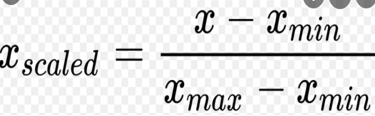

In [5]:
#Import the min max scaler as:

from sklearn.preprocessing import MinMaxScaler

In [6]:
## Creating object for MinMax Scaler:

scaling=MinMaxScaler()

In [7]:
## apply fit_transform on this 'object' ie. scaling

scaling.fit_transform(df)

array([[1.        , 0.        , 0.4722292 , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.32143755, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.43453129, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [1.        , 0.        , 0.23347575, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 1.        , 0.36792055, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.        , 0.32143755, ..., 1.        , 0.        ,
        0.        ]])

### Standardization (z-score normalization):
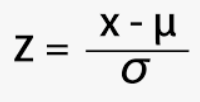

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaling1= StandardScaler()

In [10]:
scaling1.fit_transform(df)

array([[ 1.16516775, -1.36308085,  0.59159955, ..., -1.25686521,
        -0.20973381, -1.79248926],
       [ 1.16516775,  0.98683093, -0.28435342, ..., -1.25686521,
        -0.20973381,  0.5578834 ],
       [-0.85824552, -1.36308085,  0.37261131, ..., -1.25686521,
        -0.20973381,  0.5578834 ],
       ...,
       [ 1.16516775, -1.36308085, -0.79532598, ..., -1.25686521,
        -0.20973381,  0.5578834 ],
       [-0.85824552,  0.98683093, -0.01433233, ..., -1.25686521,
        -0.20973381,  0.5578834 ],
       [ 1.16516775, -1.36308085, -0.28435342, ...,  0.79563027,
        -0.20973381, -1.79248926]])

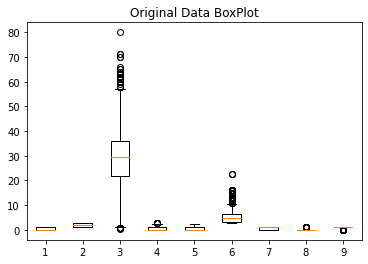

In [11]:
plt.boxplot(df)
plt.title('Original Data BoxPlot')
plt.show()


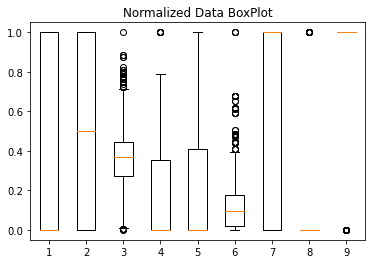

In [12]:
plt.boxplot(scaling.fit_transform(df))
plt.title('Normalized Data BoxPlot')
plt.show()


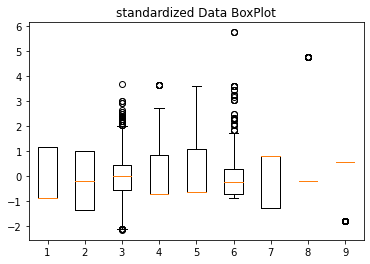

In [13]:
plt.boxplot(scaling1.fit_transform(df))
plt.title('standardized Data BoxPlot')
plt.show()


We can notice how scaling the features brings everything into perspective. The features are now more comparable and will have a similar effect on the learning models.

In [18]:
def standardizationfunction(x):
    scaling=StandardScaler()
    x_scaled=scaling.fit_transform(x)
    return x_scaled

In [19]:
def normalizationfunction(x):
    scaling=MinMaxScaler()
    x_scaled=scaling.fit_transform(x)
    return x_scaled

In [20]:
def scalingfunction(x):
    lst=[abs(df[col].skew()) for col in df.columns]
    flag=0
    for elm in lst:
        if elm>1.5:
            flag=1
            break
    if flag==0:
        return standardizationfunction(x)
    else:
        return normalizationfunction(x)

In [21]:
scalingfunction(df)

array([[1.        , 0.        , 0.4722292 , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.32143755, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.43453129, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [1.        , 0.        , 0.23347575, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 1.        , 0.36792055, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.        , 0.32143755, ..., 1.        , 0.        ,
        0.        ]])

### Skewness

scipy.stats.skew(array, axis=0, bias=True) function calculates the skewness of the data set
* skewness = 0 : normally distributed.
* skewness > 0 : more weight in the left tail of the distribution.
* skewness < 0 : more weight in the right tail of the distribution.

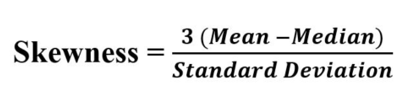


Parameters :
* array : Input array or object having the elements.
* axis : Axis along which the skewness value is to be measured. By default axis = 0.
* bias : Bool; calculations are corrected for statistical bias, if set to False.

Returns : Skewness value of the data set, along the axis.


Skewness for data :  1.1108237139164436


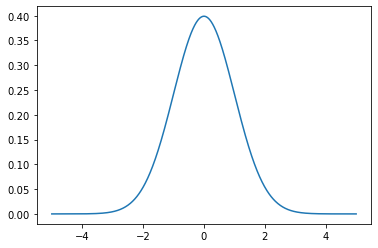

In [23]:
# Graph using numpy.linspace()
# finding Skewness

from scipy.stats import skew
import numpy as np
import pylab as p

x1 = np.linspace( -5, 5, 1000 )
y1 = 1./(np.sqrt(2.*np.pi)) * np.exp( -.5*(x1)**2 )

p.plot(x1, y1, '')

print( '\nSkewness for data : ', skew(y1))


In [22]:
# finding Skewness

from scipy.stats import skew
import numpy as np

# random values based on a normal distribution
#x = np.random.normal(0, 2, 10000)

#print ("X : \n", df)

print('\nSkewness for data : ', skew(df))



Skewness for data :  [ 0.30692224 -0.31132229  0.28313561  1.16832349  1.21193515  2.05019498
 -0.46123494  4.55821474 -1.23460586]
